# **0-Imports and Reading Data**

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import warnings as wr
import scipy
import plotly.graph_objects as go
wr.filterwarnings("ignore") #to ignore the warnings

In [2]:
df_raw= pd.read_csv(r"C:\Users\T2ABIZZ\Documents\Datasets\IT_SALARY_SURVEY\IT_Salary_Survey_EU _2020.csv")
df=df_raw.copy()



# **1-Data understanding**

In [3]:
df.shape

(1253, 23)

In [4]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [5]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [6]:
df.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

# **2-Data Preperation**

In [7]:
df = df_raw.replace(',', '.', regex=True)

In [8]:
df=df[[
       # 'Timestamp',
       'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       # 'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       # 'Yearly bonus + stocks in EUR',
       # 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       # 'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       # 'Have you lost your job due to the coronavirus outbreak?',
       # 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       # 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR'
]].copy()

In [9]:

df = df.rename(columns={"Position ": "Position",
                    "Total years of experience":"Total_years_of_experience",
                    "Years of experience in Germany":"Years_of_experience_in_Germany",
                    "Seniority level":"Seniority_level",
                    "Your main technology / programming language":"Programming_language",
                    "Yearly brutto salary (without bonus and stocks) in EUR" : "Salary",
                    "Number of vacation days" : "Vacation",
                    "Employment status":"Employment_status",
                    "Сontract duration":"Contract_duration",
                    "Main language at work":"Language",
                    "Company size":"Company_size",
                    "Company type":"Company_type"
                    })


In [10]:
df.loc[(df['Total_years_of_experience']=='1 (as QA Engineer) / 11 in total'),'Total_years_of_experience']=1
df.loc[(df['Total_years_of_experience']=='6 (not as a data scientist. but as a lab scientist)'),'Total_years_of_experience']=6
df.loc[(df['Total_years_of_experience']=='15. thereof 8 as CTO'),'Total_years_of_experience']=15
df.loc[(df['Total_years_of_experience']=='less than year'),'Total_years_of_experience']=0
df.loc[(df["Employment_status"]=="Company Director") |
       (df["Employment_status"]=="Founder") |
       (df["Employment_status"]=="full-time. but 32 hours per week (it was my request. I'm a student)")
       ,"Employment_status"]="Full-time employee"

df.loc[(df["Employment_status"]=="working student") |
       (df["Employment_status"]=="Working Student") |
       (df["Employment_status"]=="Full-time position. part-time position. & self-employed (freelancing. tutoring)")|
       (df["Employment_status"]=="Werkstudent") 
       ,"Employment_status"]="Part-time employee"

df.loc[(df["Vacation"]=="unlimited")| 
       (df["Vacation"]=="Unlimited")|
       (df["Vacation"]=="unlimited ")|
       (df["Vacation"]=="Unlimited ")|

       (df["Vacation"]=="unlimited")|
       (df["Vacation"]=="(no idea)")|
       (df["Vacation"]=="30 in contract (but theoretically unlimited)")
       ,"Vacation"]=30

df.loc[(df["Vacation"]=="24 labour days"),"Vacation"]=24
df.loc[(df["Vacation"]=="23+"),"Vacation"]=23
df.loc[(df["Vacation"]=="~25"),"Vacation"]=25



df['Total_years_of_experience'].fillna(df['Years_of_experience_in_Germany'], inplace=True)
df['Years_of_experience_in_Germany'].fillna(df['Total_years_of_experience'], inplace=True)

In [11]:
a = pd.to_numeric(df["Years_of_experience_in_Germany"], errors='coerce')
idx = a.isna()
df.loc[idx, 'Years_of_experience_in_Germany'] = df.loc[idx, 'Total_years_of_experience']

In [12]:

df = df.astype({
    "Total_years_of_experience":"float64",
    "Years_of_experience_in_Germany":"float64",
    "Salary":"float64",
    "Language":'category',
    "Vacation":"float64"

 })

In [13]:
df.head()

,Age,Gender,City,Position,Total_years_of_experience,Years_of_experience_in_Germany,Seniority_level,Programming_language,Salary,Vacation,Employment_status,Contract_duration,Language,Company_size,Company_type
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,80000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,80000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,54000.0,24.0,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,62000.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product


In [14]:
numerical_feautures=df.select_dtypes(include=[np.number])
numerical_feautures.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1226.0,3.250979e+01,5.663804e+00,20.0,29.0,32.0,35.0,6.900000e+01
Total_years_of_experience,1247.0,9.038172e+00,1.185861e+01,0.0,5.0,8.0,12.0,3.830000e+02
Years_of_experience_in_Germany,1247.0,3.817562e+00,3.730597e+00,0.0,1.0,3.0,5.0,3.000000e+01
Salary,1253.0,8.027904e+07,2.825061e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Vacation,1185.0,2.835148e+01,1.070413e+01,0.0,27.0,28.0,30.0,3.650000e+02


In [15]:
Q1 = np.percentile(df['Salary'], 25, method='midpoint')
Q3 = np.percentile(df['Salary'], 75, method='midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
upper_array = np.where(df['Salary']>=upper)[0]
lower_array = np.where(df['Salary']<=lower)[0]
print(IQR)
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

21200.0


In [16]:
df.dropna(subset=["Total_years_of_experience","Years_of_experience_in_Germany"],how="all",inplace=True)

In [17]:
df.duplicated().sum()

16

In [18]:
df.drop_duplicates(subset=["Position","Salary","City","Total_years_of_experience","Programming_language","Seniority_level"],
                     keep=False, inplace=True)

### **Initial Observations**
- **Age varies from 20 to 66 and the mean age is 32**
- **The mean salary is ~ 80000**
- **Workers get a vacation for ~30 days**

# **3-Feature Understanding**

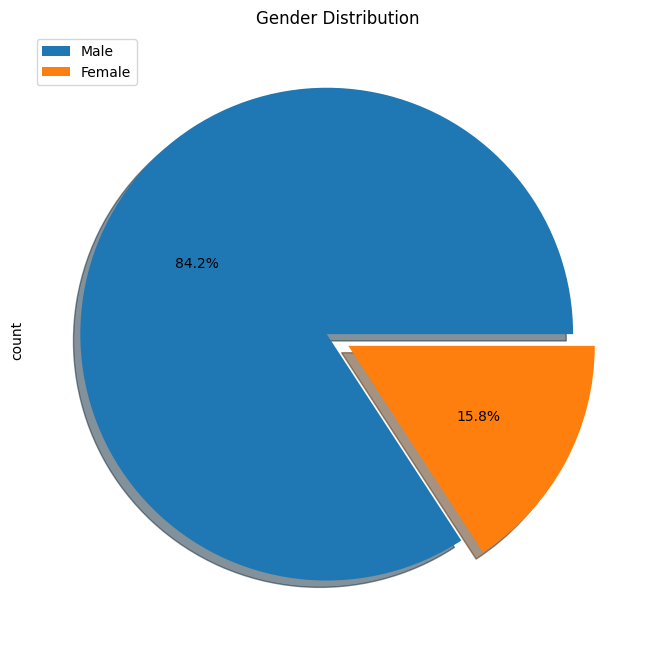

In [19]:
df["Gender"].value_counts().plot.pie(explode=[ 0.05,0.05], autopct='%1.1f%%',labels=['','',], shadow=True, figsize=(8,8))
plt.title('Gender Distribution')
plt.legend(loc='upper left',labels=df['Gender'].value_counts().index)
plt.show()

**There is huge difference between males workers and females.**

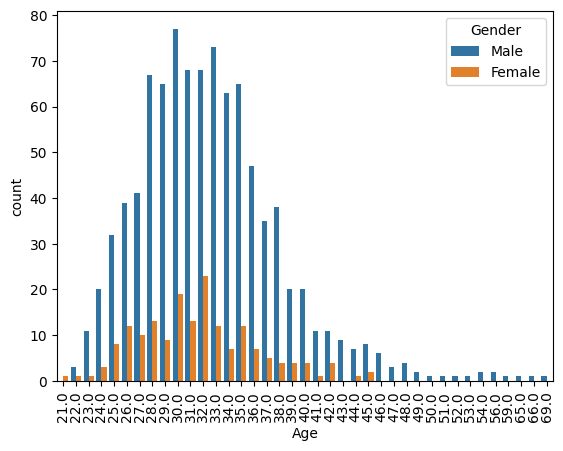

In [20]:
ax = sns.countplot(x="Age",data=df,hue="Gender")
a=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


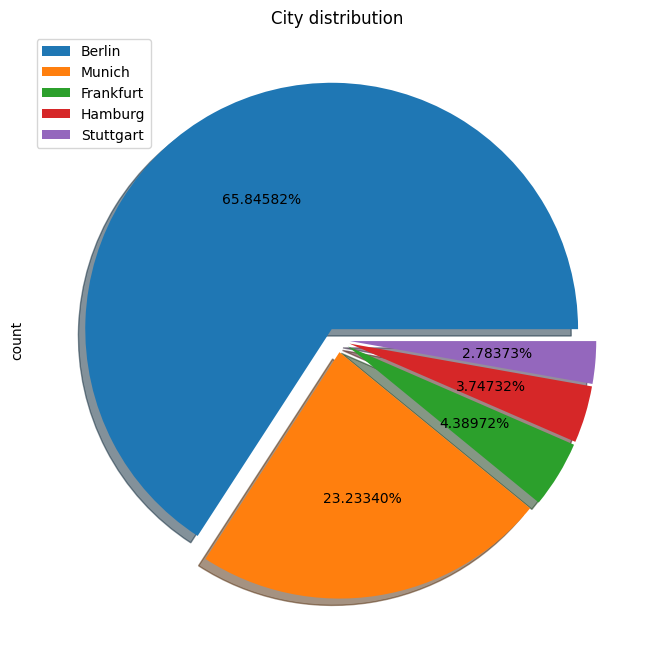

In [21]:
df["City"].value_counts().iloc[:5].plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05],autopct='%1.5f%%',shadow=True,labels=['']*5, figsize=(8,8))
plt.title('City distribution')
plt.legend(loc='upper left',labels=df['City'].value_counts().iloc[:5].index)
plt.show()

**As we can see, the visualization depicts the varying count of job positions in different cities of Germany, prominently showing Berlin with the highest number, followed by Munich and Frankfurt.**

Text(0.5, 1.0, 'Top 5 Job Positions')

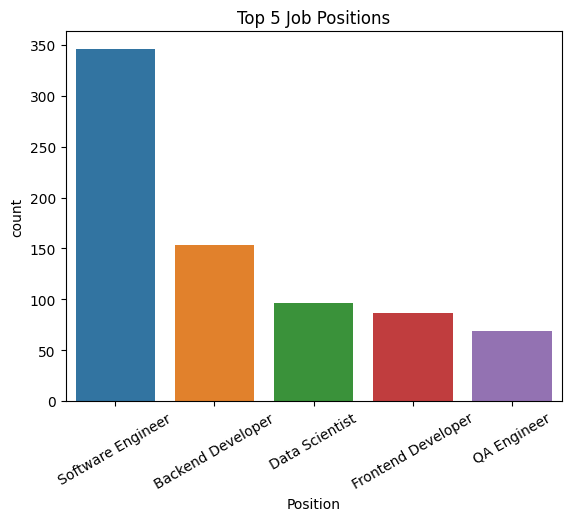

In [22]:
ax = sns.countplot(x=df["Position"],order=df.Position.value_counts().iloc[:5].index)
a=ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.title("Top 5 Job Positions")

**As you can see, there are the most Software engineers, followed by Backend Developers.**


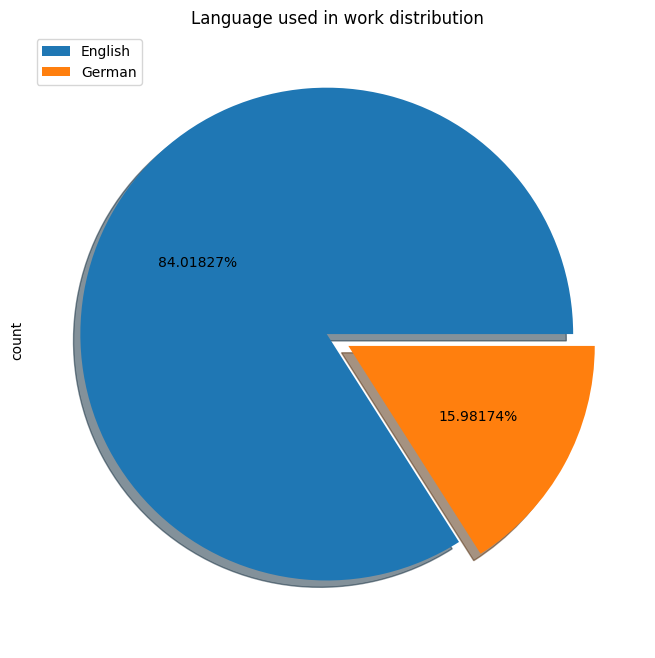

In [23]:
df["Language"].value_counts().iloc[:2].plot.pie(explode=[0.05,0.05],autopct='%1.5f%%',shadow=True,labels=['']*2, figsize=(8,8))
plt.title('Language used in work distribution')
plt.legend(loc='upper left',labels=df['Language'].value_counts().iloc[:2].index)
plt.show()

**The most commun Language during work is English, So German is not necessary to get a job in Germany.**

In [24]:
dataset= [df["Salary"]]
label=["Salary in euro"]
fig = ff.create_distplot(dataset, label, show_hist = False)
fig.update_layout(title = 'Distribution Plot of Salary in USD') 
fig.show()

In [25]:
top_l=df.loc[(df["Seniority_level"]=="Senior")
             | (df["Seniority_level"]=="Middle") 
             | (df["Seniority_level"]=="Lead") | 
            (df["Seniority_level"]=="Junior") | 
(df["Seniority_level"]=="Head")]

In [26]:
sen_lev=top_l["Seniority_level"].value_counts()
fig = px.treemap(sen_lev,path=[sen_lev.index],values=sen_lev.values,title="Seniority_level")
fig.show()

**As we can see,the senior-level positions have the highest count, followed by mid-level and Lead positions.**

# **4-Relationships**

In [27]:
df_corr=df[['Age', 'Total_years_of_experience',
       'Years_of_experience_in_Germany', 
        'Salary', 'Vacation']].dropna().corr()

<Axes: >

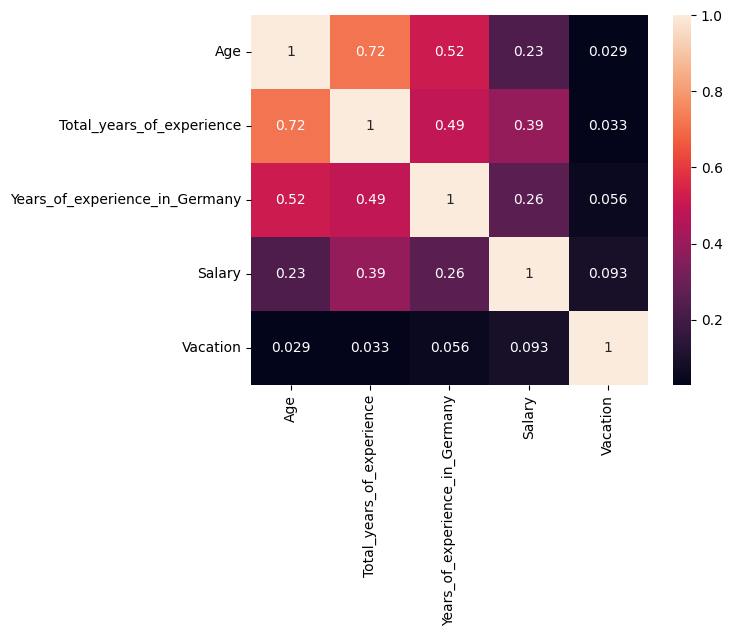

In [28]:
sns.heatmap(df_corr, annot=True)


**we can see that there is correlation between salary and Total year of experience, we will prove it later.**

In [29]:
df["Position"].value_counts().iloc[:5].sort_values(ascending=False)

Position
Software Engineer     346
Backend Developer     153
Data Scientist         96
Frontend Developer     86
QA Engineer            69
Name: count, dtype: int64

**The top 5 Positions is Software Enginner, Backend Developer, Data Scientist, Frontend Developer and QA Engineer.**

In [30]:
top_p=df.loc[(df["Position"]=="Software Engineer")
             | (df["Position"]=="Backend Developer") 
             | (df["Position"]=="Data Scientist") | 
            (df["Position"]=="Frontend Developer") | 
(df["Position"]=="QA Engineer")]

In [31]:

city=top_p[['City','Position']].value_counts()
city.to_csv('city_p.csv')
city=pd.read_csv('city_p.csv')
city.rename(columns={'0':'count'},inplace=True)
px.bar(city,x="City",y="count",color="Position",title="Number of Position in each city of Germany")

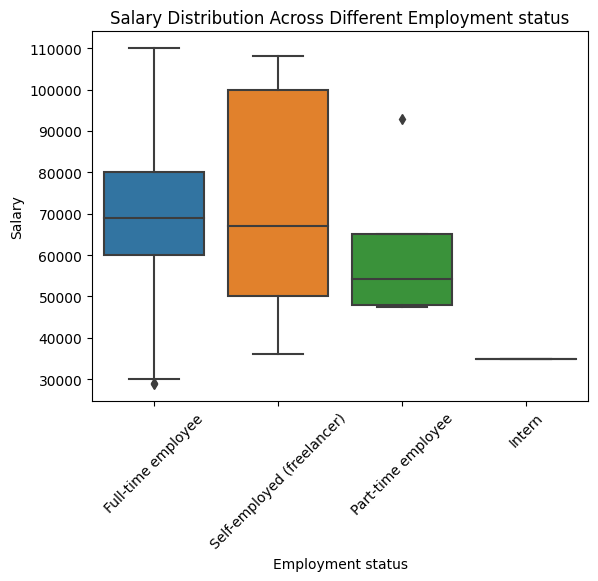

In [32]:

ax=sns.boxplot(data=df,y="Salary",x="Employment_status")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Salary Distribution Across Different Employment status')
plt.xlabel('Employment status')
plt.ylabel('Salary')
plt.show()


**The visualization effectively illustrates that full-time positions command a higher average salary compared to freelancers, while part-time roles and internships have the lowest average salaries.**

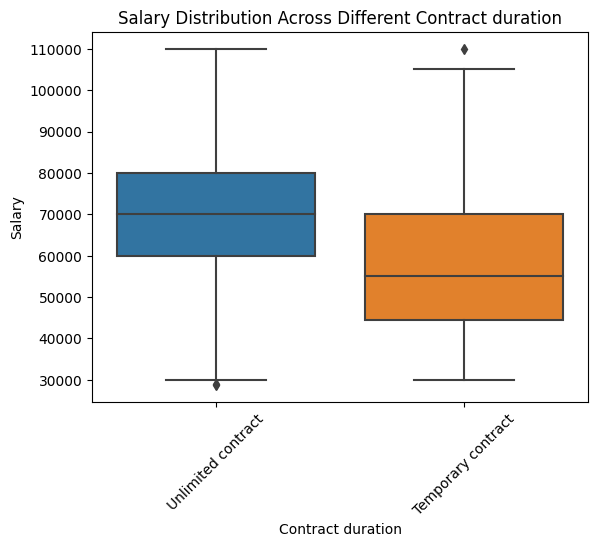

In [33]:

ax=sns.boxplot(data=df,y="Salary",x="Contract_duration")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('Salary Distribution Across Different Сontract duration')
plt.xlabel('Сontract duration')
plt.ylabel('Salary')
plt.show()

**The visualization clearly indicates that the average salary for unlimited contracts surpasses that of Temporary contracts.**

In [34]:
fig=px.scatter(top_p,x="Total_years_of_experience",y="Salary",trendline="ols",color="Gender")
fig.show()

**It's evident from the visualization that as years of experience increase, there is a corresponding rise in salary levels.**

In [35]:
Seniority_salary=df[["Seniority_level","Salary"]]
Junior_salary=df.loc[Seniority_salary["Seniority_level"]=="Junior"]
Middle_salary=df.loc[Seniority_salary["Seniority_level"]=="Middle"]
Senior_salary=df.loc[Seniority_salary["Seniority_level"]=="Senior"]
Lead_salary=df.loc[Seniority_salary["Seniority_level"]=="Lead"]
Head_salary=df.loc[Seniority_salary["Seniority_level"]=="Head"]
labels=["Junior","Middle","Senior","Lead","Head"]
data=[Junior_salary["Salary"],Middle_salary["Salary"],Senior_salary["Salary"],Lead_salary["Salary"],Head_salary["Salary"]]

mean=[Junior_salary["Salary"].mean()
      ,Middle_salary["Salary"].mean()
      ,Senior_salary["Salary"].mean()
      ,Lead_salary["Salary"].mean()
      ,Head_salary["Salary"].mean()
      ]

fig1= ff.create_distplot(data,labels,show_hist=False)
fig2 = go.Figure(data=px.bar(x=labels,
                             y=mean,
                             title="Mean salary by Seniority level",
                             text=mean))
fig2.update_layout(
    xaxis_title="Seniority Level",
    yaxis_title="Mean Salary ",
)
fig1.show()
fig2.show()

**The visualization portrays a clear hierarchy in salaries, with head and lead positions boasting a larger average salary than senior roles, while junior positions exhibit the lowest average salary within this context.**

In [36]:
df["Company_size"].value_counts()

Company_size
1000+       395
101-1000    377
11-50       157
51-100      134
up to 10     51
Name: count, dtype: int64

In [37]:
Size_salary=df[["Company_size","Salary"]]
Small_salary=df.loc[Size_salary["Company_size"]=="up to 10"]
Mid_salary=df.loc[Size_salary["Company_size"]=="11-50"]
Large_salary=df.loc[Size_salary["Company_size"]=="51-100"]
Extra_salary=df.loc[Size_salary["Company_size"]=="101-1000"]
ExtraExtra_salary=df.loc[Size_salary["Company_size"]=="1000+"]
labels=["up to 10","11-50","51-100","101-1000","1000+"]
data=[Small_salary["Salary"],Mid_salary["Salary"],Large_salary["Salary"],Extra_salary["Salary"],ExtraExtra_salary["Salary"]]

mean=[Small_salary["Salary"].mean()
      ,Mid_salary["Salary"].mean()
      ,Large_salary["Salary"].mean()
      ,Extra_salary["Salary"].mean()
      ,ExtraExtra_salary["Salary"].mean()
      ]

fig1= ff.create_distplot(data,labels,show_hist=False)
fig2 = go.Figure(data=px.bar(x=labels,
                             y=mean,
                             title="Mean salary by Company Size",
                             text=mean))
fig2.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary ",
)
fig1.show()
fig2.show()

**The visualization illustrates a distinct pattern in average salaries based on company size. Companies with more than 1000 employees and those in the range of 101-1000 employees offer the highest average salaries, whereas the lowest average salary is associated with companies in the 0-10 employee range.**

In [38]:
Position_salary=df[["Position","Salary"]]
SE_salary=df.loc[Position_salary["Position"]=="Software Engineer"]
BD_salary=df.loc[Position_salary["Position"]=="Backend Developer"]
DS_salary=df.loc[Position_salary["Position"]=="Data Scientist"]
FD_salary=df.loc[Position_salary["Position"]=="Frontend Developer"]
QA_salary=df.loc[Position_salary["Position"]=="QA Engineer"]
labels=["Software Engineer","Backend Developer","Data Scientist","Frontend Developer","QA Engineer"]
data=[SE_salary["Salary"],BD_salary["Salary"],DS_salary["Salary"],FD_salary["Salary"],QA_salary["Salary"]]
Position_salary.head()
mean=[SE_salary["Salary"].mean()
      ,BD_salary["Salary"].mean()
      ,DS_salary["Salary"].mean()
      ,FD_salary["Salary"].mean()
      ,QA_salary["Salary"].mean()
      ]

fig1= ff.create_distplot(data,labels,show_hist=False)
fig2 = go.Figure(data=px.bar(x=labels,
                             y=mean,
                             title="Mean salary by Position",
                             text=mean))
fig2.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary ",
)
fig1.show()
fig2.show()

**The visualization effectively outlines the hierarchy of average salaries according to job positions. Software Engineers (SE) and Backend Developers are positioned at the top with the highest average salaries, while Quality Assurance (QA) roles exhibit the lowest average salary within this context.**

# **4-Summary**


***In summary, the visualizations shed light on various factors influencing salary disparities within the given context. They vividly demonstrate that job positions such as Software Engineers and Backend Developers tend to command the highest average salaries, whereas roles like Quality Assurance have the lowest. Moreover, company size emerges as a crucial determinant, as companies with more than 1000 employees and those in the 101-1000 range offer the most competitive average salaries. Additionally, the data reveals a direct correlation between years of experience and salary increase, reinforcing the notion that expertise is rewarded with higher compensation. Overall, these visualizations provide valuable insights into the intricate interplay of factors impacting salary distributions in the dataset.***